In [ ]:
# Run this cell IF you are using Google Colab

from google.colab import drive

drive.mount('/content/drive')

# After the a successful run, check the file explorer tab to see your mounted drive.
# You may need to refresh the tab to see your drive folder.
# If you run out of space using your Google Drive folder, consider getting a Google One subscription.

In [ ]:
import os
import importlib.util
import ast
import numpy as np

In [ ]:
primary_directory = '/content'
primary_directory

In [ ]:
# The followng code checks if the directories already exist before attempting to create them.
# If they are not there, this code will create the directory where defined by the variable.

# Define the other directories
if primary_directory.startswith('/content'):
    use_directory = "/content/use"
else:
    use_directory = os.path.join(primary_directory, "use")

results_directory = os.path.join(primary_directory, "results")
references_directory = os.path.join(primary_directory, "references")
data_directory = os.path.join(primary_directory, "data")

# Directories to check
directories = [use_directory, results_directory, references_directory, data_directory]

# Check if the directories exist and print a message
for directory in directories:
    if os.path.exists(directory):
        print(f"Directory exists: {directory}")
    else:
        os.makedirs(directory)
        print(f"Directory created: {directory}")

In [ ]:
# Function to check if a package is installed
def check_install_package(package_name, pip_name=None):
    package_spec = importlib.util.find_spec(package_name)
    if package_spec is None:
        print(f"{package_name} not found. Installing...")
        !pip install {pip_name if pip_name else package_name}
    else:
        print(f"{package_name} is already installed.")

# Check and install package if not installed
check_install_package('matplotlib', 'matplotlib')
check_install_package('networkx', 'networkx')
check_install_package('pandas', 'pandas')

### Begin

ERSA λ
from Equation 8

$$(a(rd+c))/2^{d−1} \cdot p(t)$$

In [ ]:
# Use the table from Kong et al., 2002 to get the total autosomal genetic length
# Enter the value using digits and decimals only (i.e., no commas)
# This value is in centiMorgans (cM)
genome_length =
# In your futher developed code, you should calculate the input_value
# for the genome_length from your recombination map.

# Looking at the lambda equation from Equation 8 from the ERSA paper
num_anc =   # a: number of ancestors. Enter your choice of 1 or 2

num_rec = genome_length / 100 # r: approximate number of recombination events per meiosis
# Note: The genome_length unit of measurement is cM. One Morgan (M) is 100 cM.
# The definition of a Morgan is the space where at least one recombination event will occur.
# Therefore, we divide our cM value by 100 cM because, on average, 1 recombination event
# will occur every 100 cM or 1 M.

d =   # d: meiotic distance between individuals in a pair. Enter value of choice.

num_chr =   # c: number of autosomes in humans

min_seg_len =  2.5 # t: minimum detectable segment length in cM

<details>
  <summary>Click to see answer.</summary>
  
```
genome_length =   3435.71
num_rec = genome_length / 100
num_chr = 22
min_seg_len = 2.5
```

</details>

The probability of a segment being longer than the threshold

$$p(t)= e^{-dt/100}$$

Recall that the following

$$e^x$$

is coded as follows:

```
import numpy as np

np.exp(x)
```



In [7]:
prob_greater_than_t =

<details>
  <summary>Click to see answer.</summary>
  
`prob_greater_than_t = np.exp(-d * min_seg_len / 100)`

</details>

Lambda mean is the mean number of segments shared.


$$λ = (a(rd+c))/2^{d−1} \cdot p(t)$$

In [9]:
lambda_mean =

<details>
  <summary>Click to see answer.</summary>
  
`lambda_mean = ((num_anc * (num_rec * d + num_chr)) / (2 ** (d - 1))) * prob_greater_than_t`

</details>

In [22]:
print(lambda_mean)

36.064195454401045


So now we have our mean, Poison-distributed, number of segments shared between a pair, given the parameter values.

According to the ERSA paper, the number of segments for meiotic distance has a poisson distribution. The Poisson distribution is a discrete distribution that models the probability of a certain number of events occurring within a fixed interval of time or space.

The formula for the Poisson distribution is known as the probability mass function (PMF). We will use the `poisson.pmf` method from the `scipy.stats` package.

$$poisson.pmf(k, λ)$$

where

k is the number of events (k) = actual number of shared segments in pair

λ is the rate parameter λ

<br>

The Poisson probability mass function `poisson.pmf(k, λ)` gives the probability of observing exactly k shared segments, given the mean λ, where λ represents the relationship among a set of variables.

In [17]:
from scipy.stats import poisson

# The probability of sharing 0 segment given your parameter values above.

poisson.pmf(0, lambda_mean)

2.1752987980169267e-16

In [18]:
# The probability of sharing 1 segment given your parameter values above.

poisson.pmf(1, lambda_mean)

7.845040102340624e-15

In [19]:
# The probability of sharing 3 segment given your parameter values above.

poisson.pmf(3, lambda_mean)

1.7005774413842818e-12

In [20]:
# The probability of sharing 5 segment given your parameter values above.

poisson.pmf(5, lambda_mean)

1.1059077824021422e-10

If you want to see the probabilty of sharing 0, 1, 3, and 5 segments given a different set of parameter values, you would need to change your values above and rerun the cells (including the cell where you changed your parameter values).

Rather than plugging values for the number of segments we are interested in one by one, we may be interested in looking at a range of segment number values. This is called our distribution.

<br>

We will create a range based on the mean and standard deviation of the number of segments. Because the number of segments shared is Poisson-distributed, we know that the standard deviation is approximated as the square root of the mean.

In [23]:
# Using the numpy package, this gives us a range from 0 to a value that is int(lambda_mean) + 3*np.sqrt(lambda_mean)

n_values = np.arange(0, int(lambda_mean) + 3*np.sqrt(lambda_mean))
n_values

array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12.,
       13., 14., 15., 16., 17., 18., 19., 20., 21., 22., 23., 24., 25.,
       26., 27., 28., 29., 30., 31., 32., 33., 34., 35., 36., 37., 38.,
       39., 40., 41., 42., 43., 44., 45., 46., 47., 48., 49., 50., 51.,
       52., 53., 54.])

In [24]:
from scipy.stats import poisson

distribution_num_segments = poisson.pmf(n_values, lambda_mean)

# Display the distribution
distribution_num_segments


array([2.17529880e-16, 7.84504010e-15, 1.41462530e-13, 1.70057744e-12,
       1.53324893e-11, 1.10590778e-10, 6.64727907e-10, 3.42469674e-09,
       1.54386166e-08, 6.18645873e-08, 2.23109657e-07, 7.31479115e-07,
       2.19835048e-06, 6.09859549e-06, 1.57100671e-05, 3.77713955e-05,
       8.51371868e-05, 1.80612008e-04, 3.61868154e-04, 6.86867571e-04,
       1.23856632e-03, 2.12704275e-03, 3.48682206e-03, 5.46736663e-03,
       8.21567411e-03, 1.18516671e-02, 1.64392630e-02, 2.19581035e-02,
       2.82821905e-02, 3.51715327e-02, 4.22811010e-02, 4.91881900e-02,
       5.54353905e-02, 6.05828109e-02, 6.42608922e-02, 6.62147821e-02,
       6.63328568e-02, 6.46551652e-02, 6.13614873e-02, 5.67423761e-02,
       5.11592036e-02, 4.50003785e-02, 3.86405344e-02, 3.24079020e-02,
       2.65628389e-02, 2.12881648e-02, 1.66900116e-02, 1.28066349e-02,
       9.62210385e-03, 7.08190681e-03, 5.10806543e-03, 3.61212294e-03,
       2.50515977e-03, 1.70465229e-03, 1.13846136e-03])

You can also plot the distribution.

The maximum probablity is 0.06633285681370232 with a segment sharing of 36.0 segments.


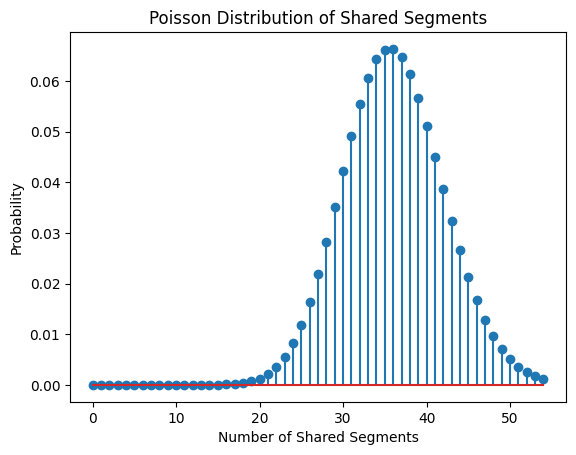

In [27]:
import matplotlib.pyplot as plt

# Plot the distribution
plt.stem(n_values, distribution_num_segments)
plt.xlabel('Number of Shared Segments')
plt.ylabel('Probability')
plt.title('Poisson Distribution of Shared Segments')


# Find the value with the maximum probability
max_prob_n = n_values[np.argmax(distribution_num_segments)]
max_prob = np.max(distribution_num_segments)

# Output the number of shared segments with the maximum probability and its probability
print(f"The maximum probablity is {max_prob} with a segment sharing of {max_prob_n} segments." )

plt.show()

Similarly with equation 7...

In [28]:
# Equation 7 describes the probability density function of an exponential distribution
# conditioned on a threshold t.

# Range of segment lengths from t to 100 cM
# Containing 1000 evenly spaced points between these two limits
length_range = np.linspace(min_seg_len, 100, 1000)

# Calculate the probability density function values for the range of segment lengths i
# conditioned on the threshold t
length_size_distribution = np.exp(-d * (length_range - min_seg_len) / 100) / (100 / d)

length_size_distribution

array([0.04      , 0.03984415, 0.0396889 , 0.03953426, 0.03938023,
       0.03922679, 0.03907395, 0.03892171, 0.03877006, 0.038619  ,
       0.03846853, 0.03831864, 0.03816934, 0.03802062, 0.03787248,
       0.03772492, 0.03757793, 0.03743152, 0.03728567, 0.0371404 ,
       0.03699569, 0.03685154, 0.03670796, 0.03656493, 0.03642247,
       0.03628055, 0.03613919, 0.03599838, 0.03585812, 0.03571841,
       0.03557924, 0.03544061, 0.03530253, 0.03516498, 0.03502796,
       0.03489149, 0.03475554, 0.03462012, 0.03448523, 0.03435087,
       0.03421702, 0.0340837 , 0.0339509 , 0.03381862, 0.03368685,
       0.0335556 , 0.03342486, 0.03329462, 0.0331649 , 0.03303568,
       0.03290696, 0.03277875, 0.03265103, 0.03252381, 0.03239709,
       0.03227086, 0.03214513, 0.03201988, 0.03189512, 0.03177085,
       0.03164706, 0.03152375, 0.03140093, 0.03127858, 0.03115671,
       0.03103531, 0.03091439, 0.03079394, 0.03067396, 0.03055444,
       0.03043539, 0.03031681, 0.03019868, 0.03008102, 0.02996

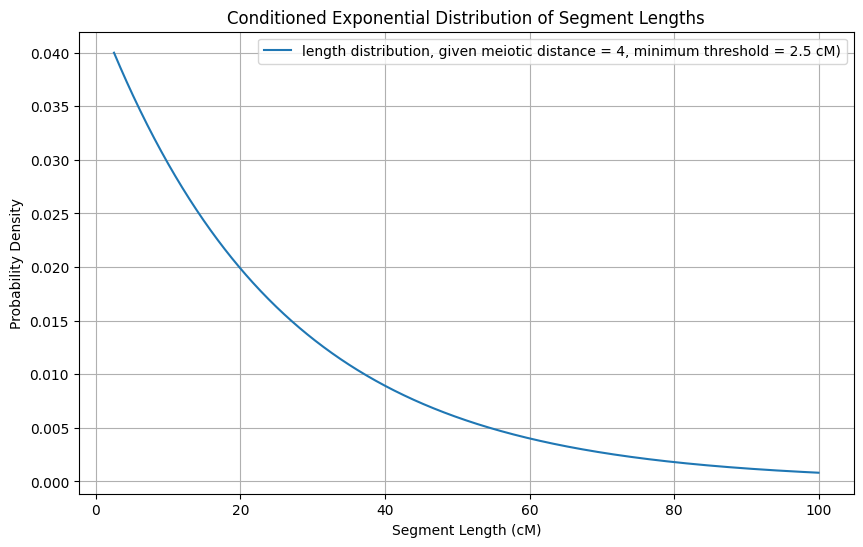

In [29]:
# Now let's plot the distribution
plt.figure(figsize=(10, 6))
plt.plot(length_range, length_size_distribution, label=f'length distribution, given meiotic distance = {d}, minimum threshold = {min_seg_len} cM)')
plt.xlabel('Segment Length (cM)')
plt.ylabel('Probability Density')
plt.title('Conditioned Exponential Distribution of Segment Lengths')
plt.legend()
plt.grid(True)
plt.show()


### Bonsai snippet

This is a code snippet from the Bonsai algorithm that we will use to infer genetic pedigrees. Can you match the code lines with the ERSA paper?

k_mean_1, the number of segments, is designed to reflect equation 8. What's the same? What's different?

T_mean_1, the average length, doesn't quite look like equation 7. What is it doing?  

In [ ]:
    def get_analytical_distant_relative_distribution(
        self, relation_tuple: Tuple[int, int, int]
    ):
        """
        Get the paramters for the log likelihood using the Huff et al (2011) formula.
        (Equations 7, 8, and the paragraph before Eqn 7). This is for the case when
        two people are related by more than 14 meioses. We do not simulate IBD
        distributions for relationships this distant so we need to use the analytical
        distribution.
        """
        up_meioses = relation_tuple[0]
        down_meioses = relation_tuple[1]
        num_ancestors = relation_tuple[2]

        num_recs_per_gen = genome_length / 100

        g = up_meioses + down_meioses

        expected_mean_k = (
            num_ancestors * (num_recs_per_gen * g + 22) * (1 / (2 ** (g - 1)))
        )


        p_obs = np.exp(
            -g * self.min_seg_len / 100
        )  # Probability that a segment is observed, given that the minimum IBD length is min_seg_len

        # The number of shared segments is reduced by the probability that a segment is observed
        k_mean_1 = expected_mean_k * p_obs

        k_std_1 = np.sqrt(k_mean_1)

        threshold = self.min_seg_len

        """

        # FIX FIX: order of operations.
        # FIX FIX: use equation 7 instead of this

        """
        T_mean_1 = (100 / g - threshold) * k_mean_1

        """
        The standard deviation of the total length (T_std_1) is computed using the square root of
        twice the mean number of shared segments, multiplied by 100/g, based on the law of total variance.
        """
        T_std_1 = (100 / g) * np.sqrt(2 * k_mean_1)  # From the law of total variance

        T_mean_2, T_std_2 = (0, 5)  # Parameters for background IBD2

        return (k_mean_1, k_std_1, T_mean_1, T_std_1, T_mean_2, T_std_2)